In [19]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_csv("housing1.csv")

In [21]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [23]:
data.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [24]:
data.dropna(inplace = True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [28]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [29]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [30]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)

In [31]:
train_data = x_train.join(y_train)

In [32]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
6611,-117.18,32.69,44.0,2819.0,514.0,1258.0,503.0,4.4777,NEAR OCEAN,452800.0
217,-121.98,38.37,21.0,3027.0,675.0,2018.0,642.0,2.8438,INLAND,111500.0
6777,-122.63,38.21,22.0,2933.0,461.0,1283.0,449.0,6.2034,<1H OCEAN,291100.0
7034,-118.25,33.99,42.0,2261.0,574.0,2496.0,527.0,1.5556,<1H OCEAN,98500.0
19905,-122.42,37.74,52.0,2019.0,418.0,999.0,448.0,4.2212,NEAR BAY,271300.0
...,...,...,...,...,...,...,...,...,...,...
2647,-117.80,33.89,25.0,3121.0,381.0,1278.0,389.0,7.0217,<1H OCEAN,357900.0
6162,-117.93,33.65,26.0,5831.0,1546.0,4738.0,1477.0,3.1483,<1H OCEAN,213000.0
11768,-120.37,36.16,36.0,613.0,124.0,310.0,124.0,3.0658,INLAND,65000.0
11030,-117.71,33.60,25.0,3011.0,714.0,893.0,654.0,2.3387,<1H OCEAN,74800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

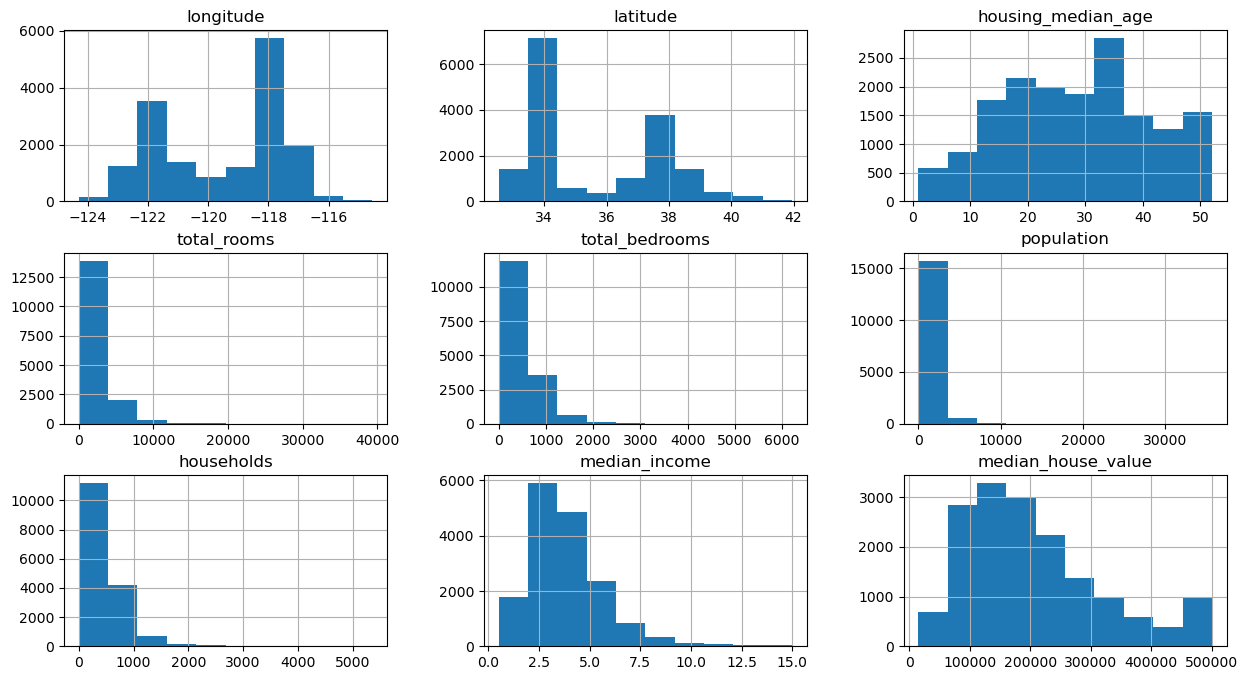

In [33]:
train_data.hist(figsize =(15,8))

C:\Users\ranzi\AppData\Local\Temp\ipykernel_6740\1516048829.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap="Oranges")


<Axes: >

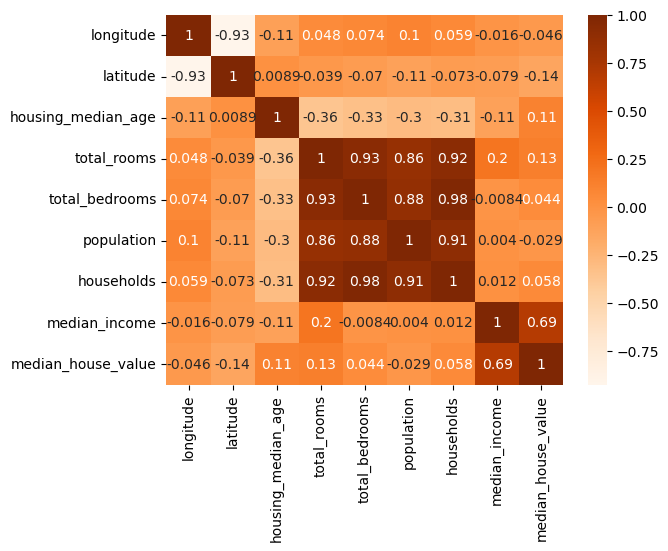

In [34]:
sns.heatmap(train_data.corr(),annot=True,cmap="Oranges")

In [35]:
train_data['total_rooms']= np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']= np.log(train_data['total_bedrooms']+1)
train_data['population']= np.log(train_data['population']+1)
train_data['households']= np.log(train_data['households']+1)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

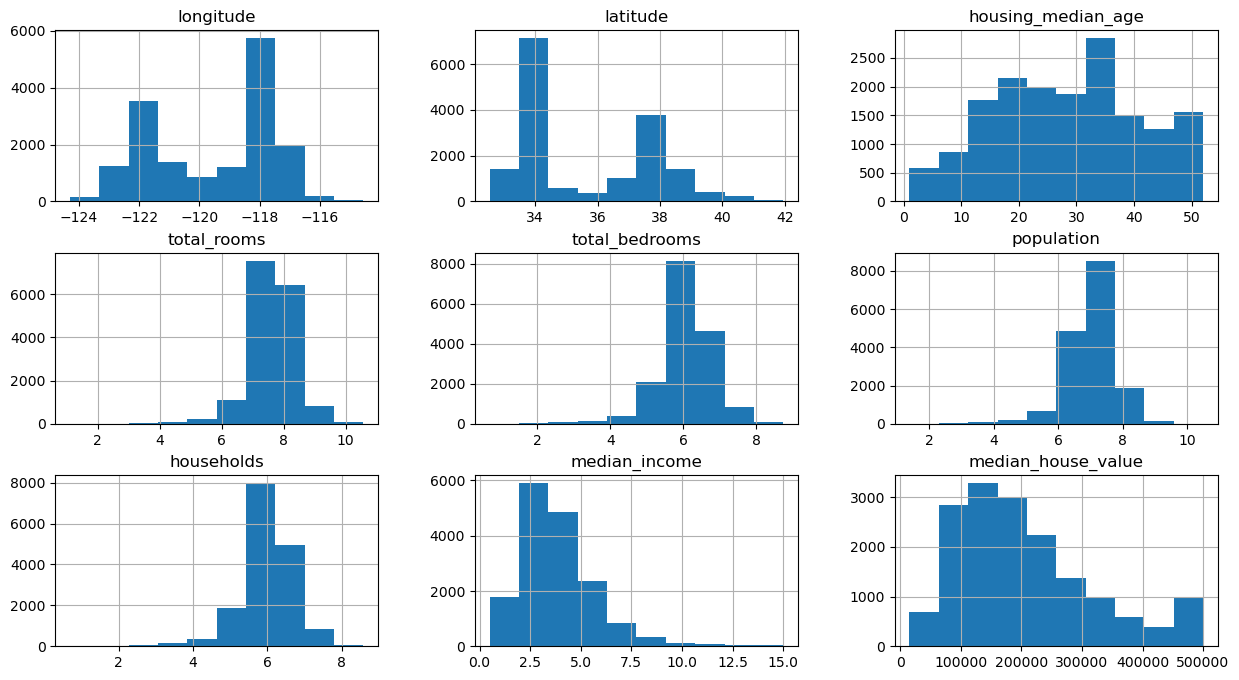

In [36]:
train_data.hist(figsize=(15,8)).drop(['ocean'])

In [37]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [38]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6611,-117.18,32.69,44.0,7.944492,6.244167,7.138073,6.222576,4.4777,452800.0,0,0,0,0,1
217,-121.98,38.37,21.0,8.015658,6.516193,7.610358,6.466145,2.8438,111500.0,0,1,0,0,0
6777,-122.63,38.21,22.0,7.984122,6.135565,7.157735,6.109248,6.2034,291100.0,1,0,0,0,0
7034,-118.25,33.99,42.0,7.724005,6.354370,7.822845,6.269096,1.5556,98500.0,1,0,0,0,0
19905,-122.42,37.74,52.0,7.610853,6.037871,6.907755,6.107023,4.2212,271300.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,-117.80,33.89,25.0,8.046229,5.945421,7.153834,5.966147,7.0217,357900.0,1,0,0,0,0
6162,-117.93,33.65,26.0,8.671115,7.344073,8.463581,7.298445,3.1483,213000.0,1,0,0,0,0
11768,-120.37,36.16,36.0,6.419995,4.828314,5.739793,4.828314,3.0658,65000.0,0,1,0,0,0
11030,-117.71,33.60,25.0,8.010360,6.572283,6.795706,6.484635,2.3387,74800.0,1,0,0,0,0


<Axes: xlabel='latitude', ylabel='longitude'>

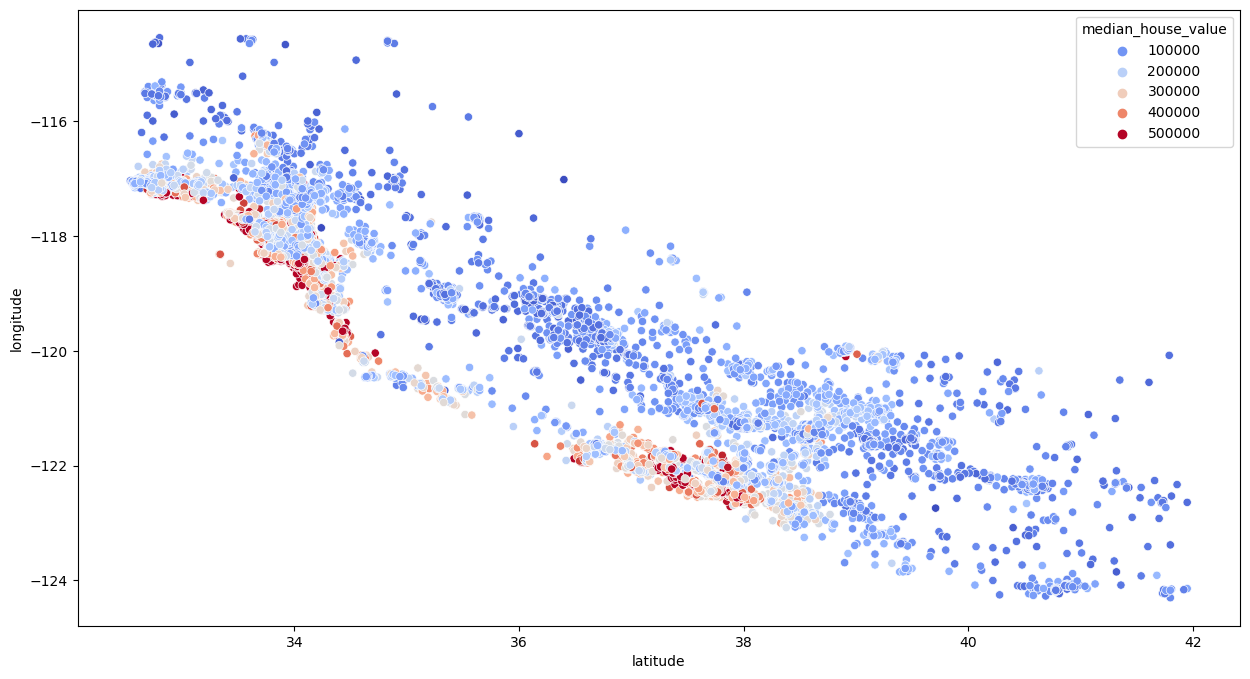

In [39]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette='coolwarm')


In [40]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['total_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

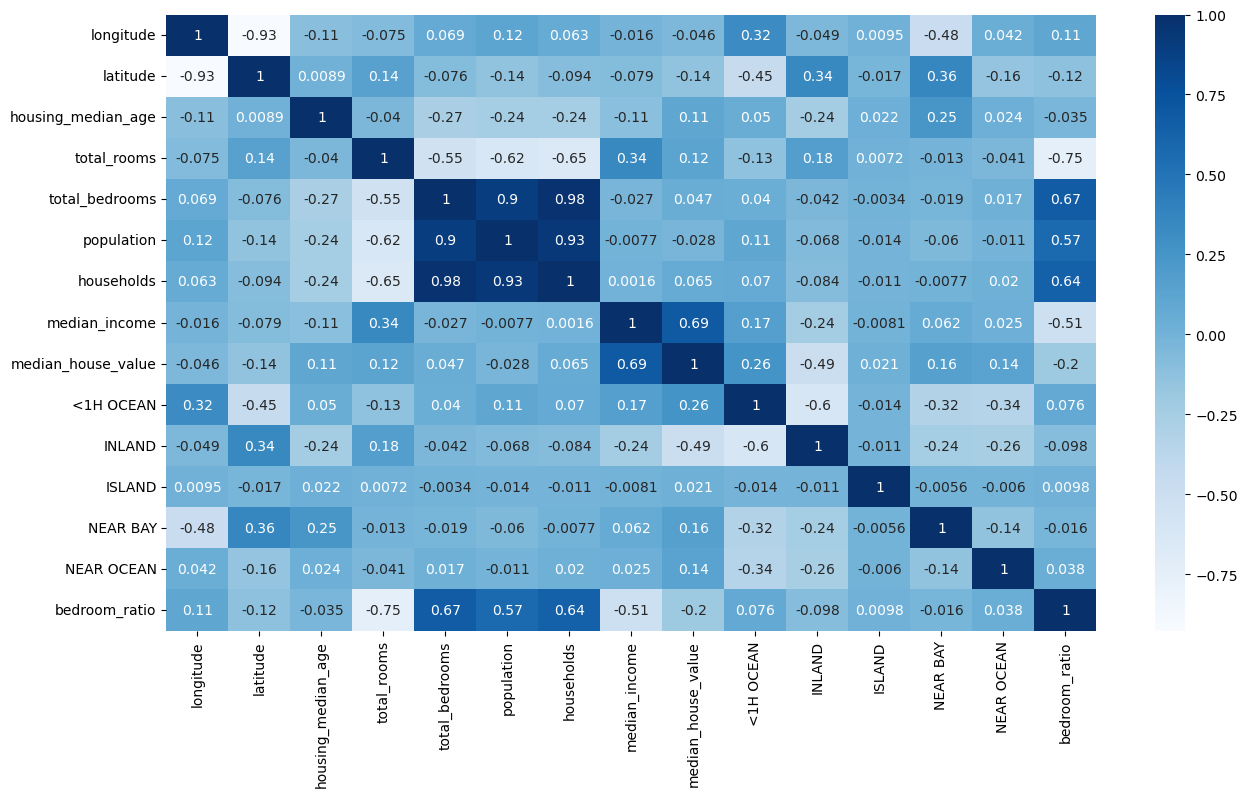

In [41]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="Blues")

In [42]:
from sklearn.linear_model import LinearRegression
x_train,y_train =train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']



reg =LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [43]:
test_data = x_test.join(y_test)
test_data['total_rooms']= np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']= np.log(test_data['total_bedrooms']+1)
test_data['population']= np.log(test_data['population']+1)
test_data['households']= np.log(test_data['households']+1)
test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['total_rooms']=test_data['total_rooms']/test_data['households']

In [44]:
x_test,y_test =test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [45]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
667,-122.25,37.49,44.0,1.271600,6.612041,7.490529,6.601230,6.1420,0,0,0,0,1,0.787699
19738,-121.80,37.19,45.0,1.328351,5.717028,6.769642,5.641907,4.5417,1,0,0,0,0,0.762837
8154,-122.26,37.48,34.0,1.290216,6.526495,7.498870,6.511745,5.6038,0,0,0,0,1,0.776820
16645,-117.11,32.59,17.0,1.224357,6.282267,7.333023,6.216606,2.1773,0,0,0,0,1,0.825382
528,-118.39,33.71,18.0,1.303906,5.455321,6.165418,5.433722,7.5594,0,0,0,0,1,0.769975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19685,-122.18,37.79,41.0,1.350447,5.455321,6.440947,5.370638,7.0875,0,0,0,1,0,0.752171
3133,-118.18,34.13,52.0,1.260537,6.165418,7.179308,6.115892,3.5341,1,0,0,0,0,0.799737
9450,-117.71,33.63,16.0,1.284202,5.872118,6.852243,5.765191,3.4261,1,0,0,0,0,0.793136
17449,-122.29,38.00,16.0,1.229612,6.986566,7.939515,6.924612,4.0250,0,0,0,1,0,0.820541


In [46]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
667,-122.25,37.49,44.0,1.271600,6.612041,7.490529,6.601230,6.1420,394700.0,0,0,0,0,1,0.787699
19738,-121.80,37.19,45.0,1.328351,5.717028,6.769642,5.641907,4.5417,434500.0,1,0,0,0,0,0.762837
8154,-122.26,37.48,34.0,1.290216,6.526495,7.498870,6.511745,5.6038,451300.0,0,0,0,0,1,0.776820
16645,-117.11,32.59,17.0,1.224357,6.282267,7.333023,6.216606,2.1773,143200.0,0,0,0,0,1,0.825382
528,-118.39,33.71,18.0,1.303906,5.455321,6.165418,5.433722,7.5594,500001.0,0,0,0,0,1,0.769975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19685,-122.18,37.79,41.0,1.350447,5.455321,6.440947,5.370638,7.0875,240700.0,0,0,0,1,0,0.752171
3133,-118.18,34.13,52.0,1.260537,6.165418,7.179308,6.115892,3.5341,182100.0,1,0,0,0,0,0.799737
9450,-117.71,33.63,16.0,1.284202,5.872118,6.852243,5.765191,3.4261,219700.0,1,0,0,0,0,0.793136
17449,-122.29,38.00,16.0,1.229612,6.986566,7.939515,6.924612,4.0250,173200.0,0,0,0,1,0,0.820541


In [47]:
reg.score(x_test,y_test)

0.6666245217979019

In [48]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(x_train,y_train)


RandomForestRegressor()

In [49]:
forest.score(x_test,y_test)

0.8219770208353075

In [50]:
from sklearn.model_selection import RandomizedSearchCV
forest = RandomForestRegressor()
param_grid = {
    "n_estimators":[3,10,30],
    "max_features":[2,4,6,8]
}
random_search = RandomizedSearchCV(forest,cv = 3,param_distributions=param_grid,scoring="neg_mean_squared_error",return_train_score=True)
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': [2, 4, 6, 8],
                                        'n_estimators': [3, 10, 30]},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [51]:
best_forest = random_search.best_estimator_

In [52]:
random_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [53]:
best_forest.score(x_test,y_test)

0.8186366788406589

In [64]:
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [65]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("scaler",scaler),
                     ('selector', SelectFromModel(RandomForestRegressor(random_state=42),threshold=0.005)),
                     ("random_forest",best_forest)])

In [67]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=42),
                                 threshold=0.005)),
                ('random_forest',
                 RandomForestRegressor(max_features=8, n_estimators=30))])

In [68]:
pipeline.score(x_test,y_test)

0.8163824948600839